<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/reviw1_15days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
df = pd.read_csv("/Boston.csv")

In [24]:
df.shape

(506, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [26]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


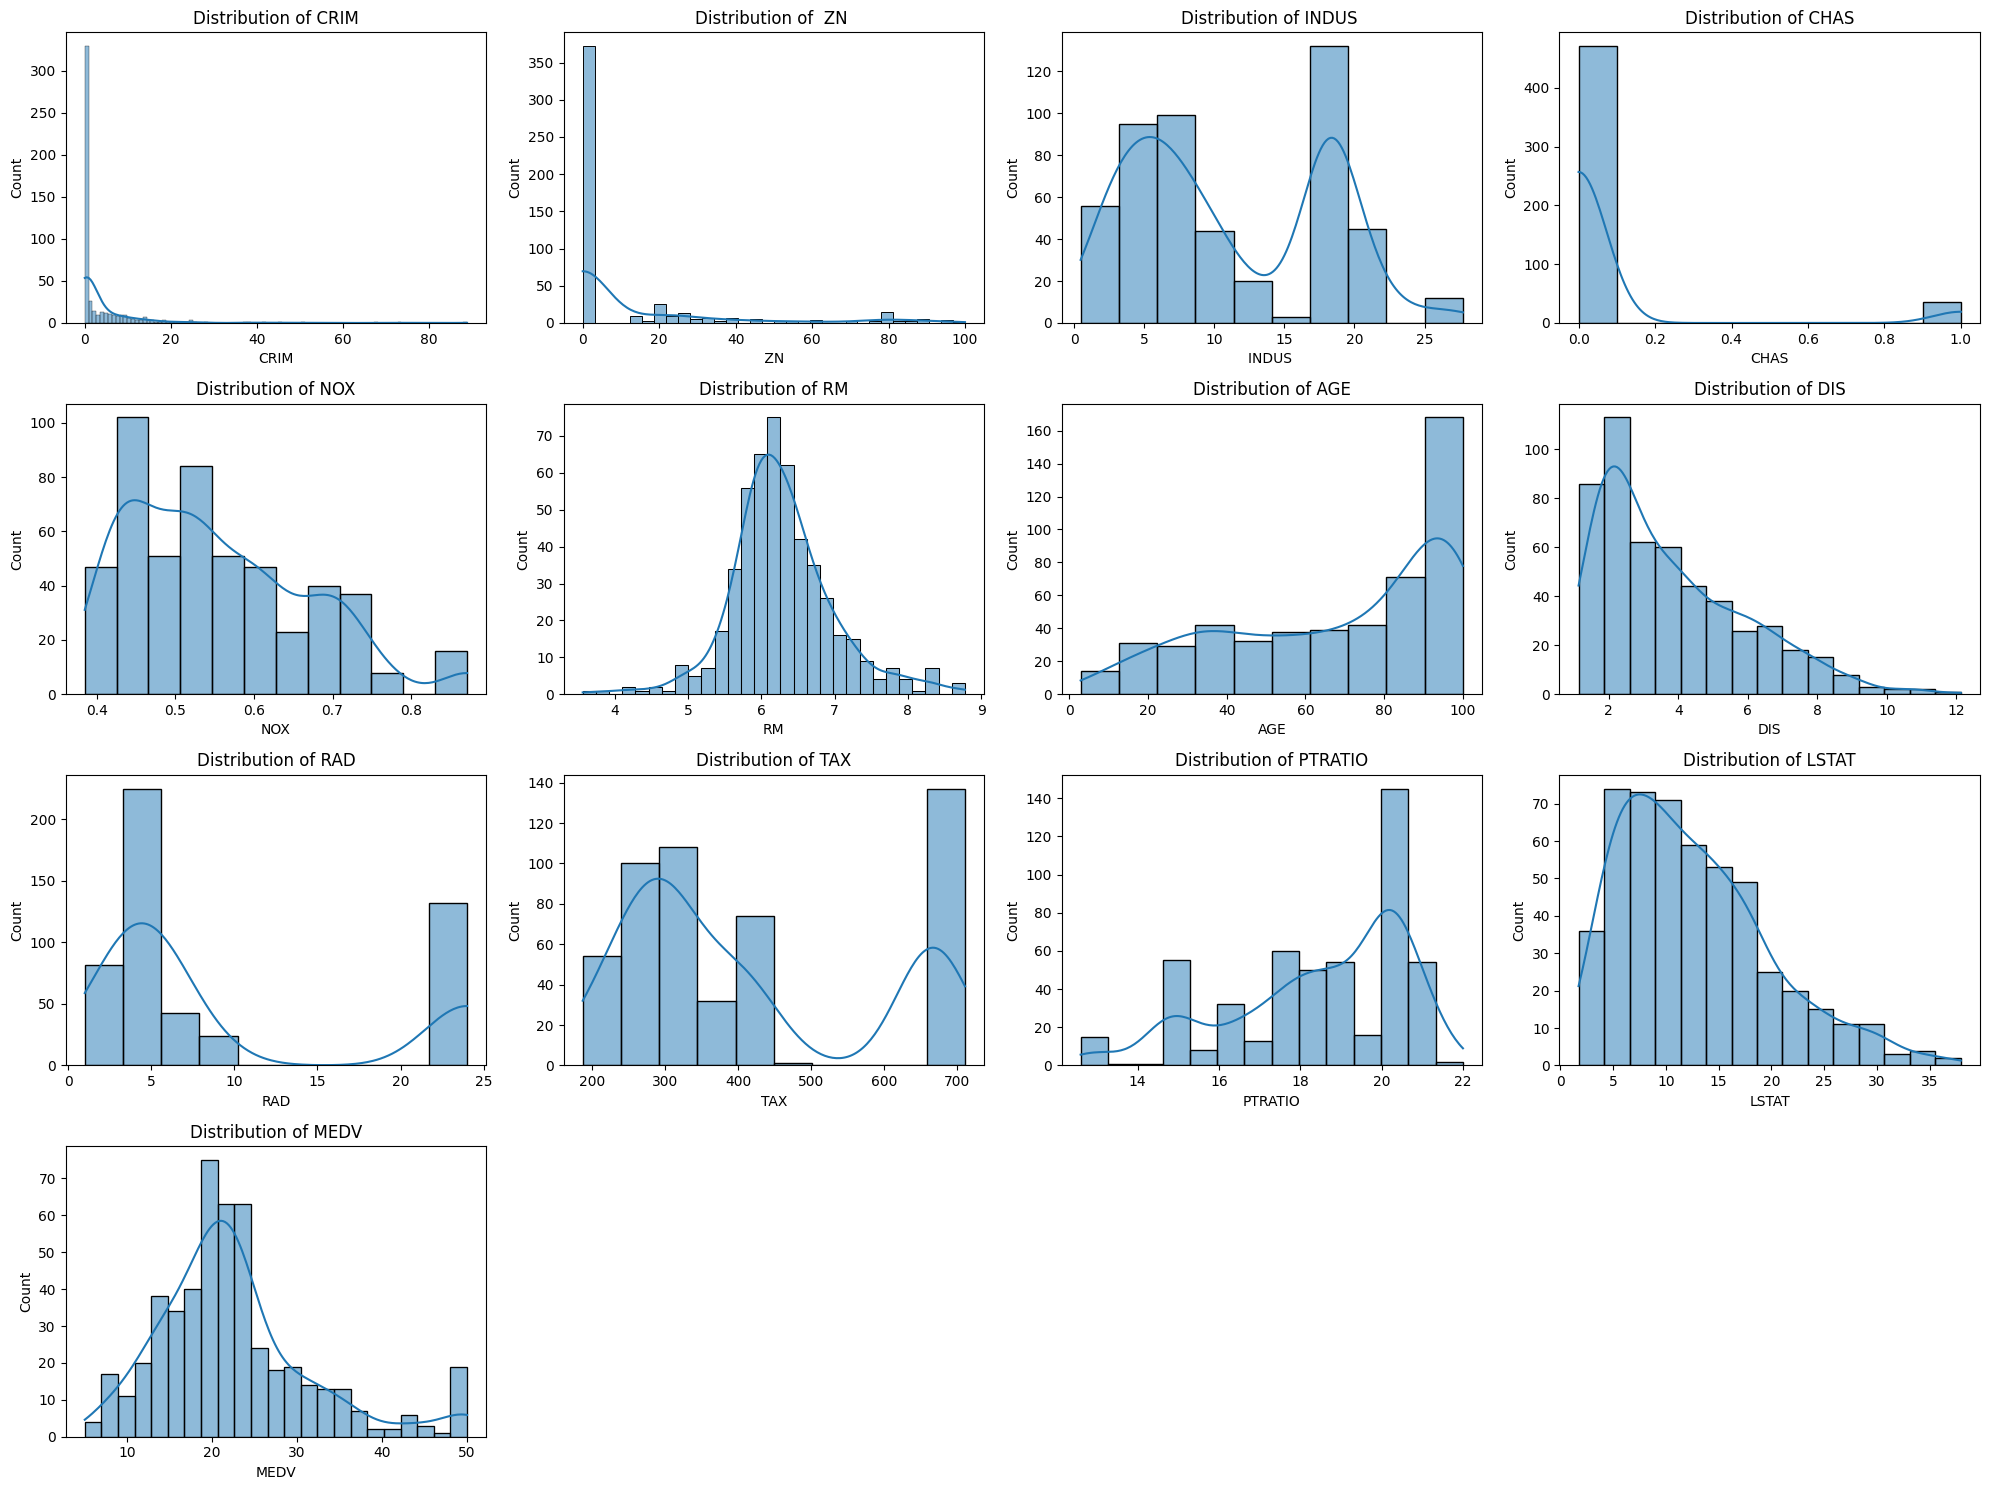

In [27]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig("day2_univariate_analysis.png")
plt.show()

In [28]:
df['AGE_RM_RATIO'] = df['AGE'] / df['RM']

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_RM_RATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,9.916350
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,12.287806
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,8.503827
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,6.544727
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,7.583602


In [30]:
df[['AGE', 'RM', 'AGE_RM_RATIO']].head()

,AGE,RM,AGE_RM_RATIO
0,65.2,6.575,9.916350
1,78.9,6.421,12.287806
2,61.1,7.185,8.503827
3,45.8,6.998,6.544727
4,54.2,7.147,7.583602


In [31]:
df['AGE_RM_RATIO'].describe()

,AGE_RM_RATIO
count,506.000000
mean,11.187488
std,5.071922
min,0.428360
25%,7.039955
50%,12.093020
75%,15.206739
max,25.886617


In [33]:
corr = df.corr()

In [34]:
top_features = corr['MEDV'].abs().sort_values(ascending=False).head(10).index.tolist()

In [38]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
X_scaled_df.head()

,LSTAT,RM,PTRATIO,AGE_RM_RATIO,INDUS,TAX,NOX,CRIM,RAD
0,-1.075562,0.413672,-1.459000,-0.250871,-1.287909,-0.666608,-0.144217,-0.419782,-0.982843
1,-0.492439,0.194274,-0.303094,0.217158,-0.593381,-0.987329,-0.740262,-0.417339,-0.867883
2,-1.208727,1.282714,-0.303094,-0.529645,-0.593381,-0.987329,-0.740262,-0.417342,-0.867883
3,-1.361517,1.016303,0.113032,-0.916291,-1.306878,-1.106115,-0.835284,-0.416750,-0.752922
4,-1.026501,1.228577,0.113032,-0.711260,-1.306878,-1.106115,-0.835284,-0.412482,-0.752922


In [35]:
X = df[top_features].drop('MEDV', axis=1)
y = df['MEDV']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [40]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R2:", r2_lr)

Linear Regression RMSE: 4.894752558051351
MAE: 3.1436003802812245
R2: 0.6732937866825752


In [41]:
rmse_lr

np.float64(4.894752558051351)

In [43]:
r2_lr

0.6732937866825752

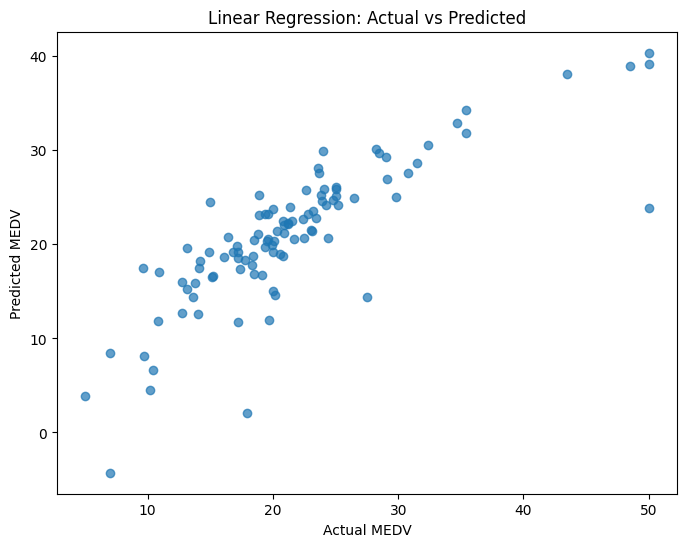

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs Predicted")
plt.savefig("day13_lr_actual_vs_predicted.png")
plt.show()


In [45]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("day3_correlation_heatmap.png")
plt.close()

In [46]:
#plt.close() does not show the figure it hides so we have to add plt.show()

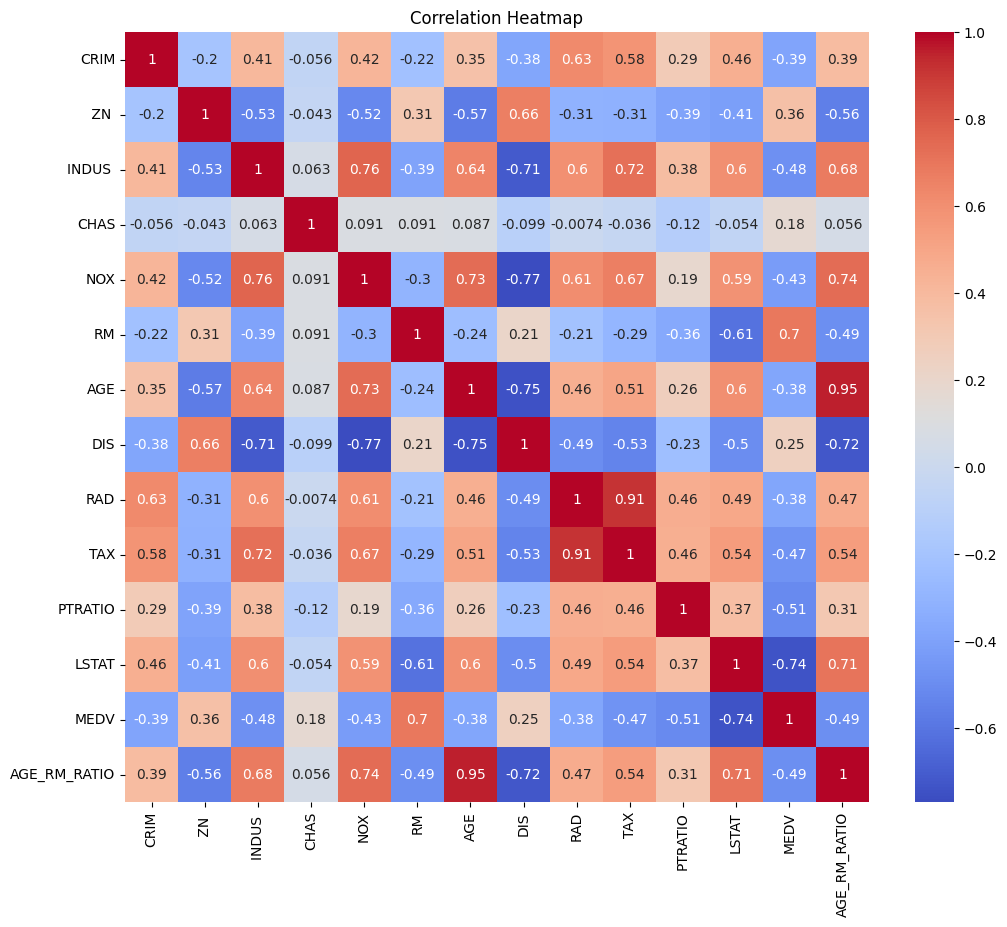

In [47]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("day3_correlation_heatmap.png")
plt.show()

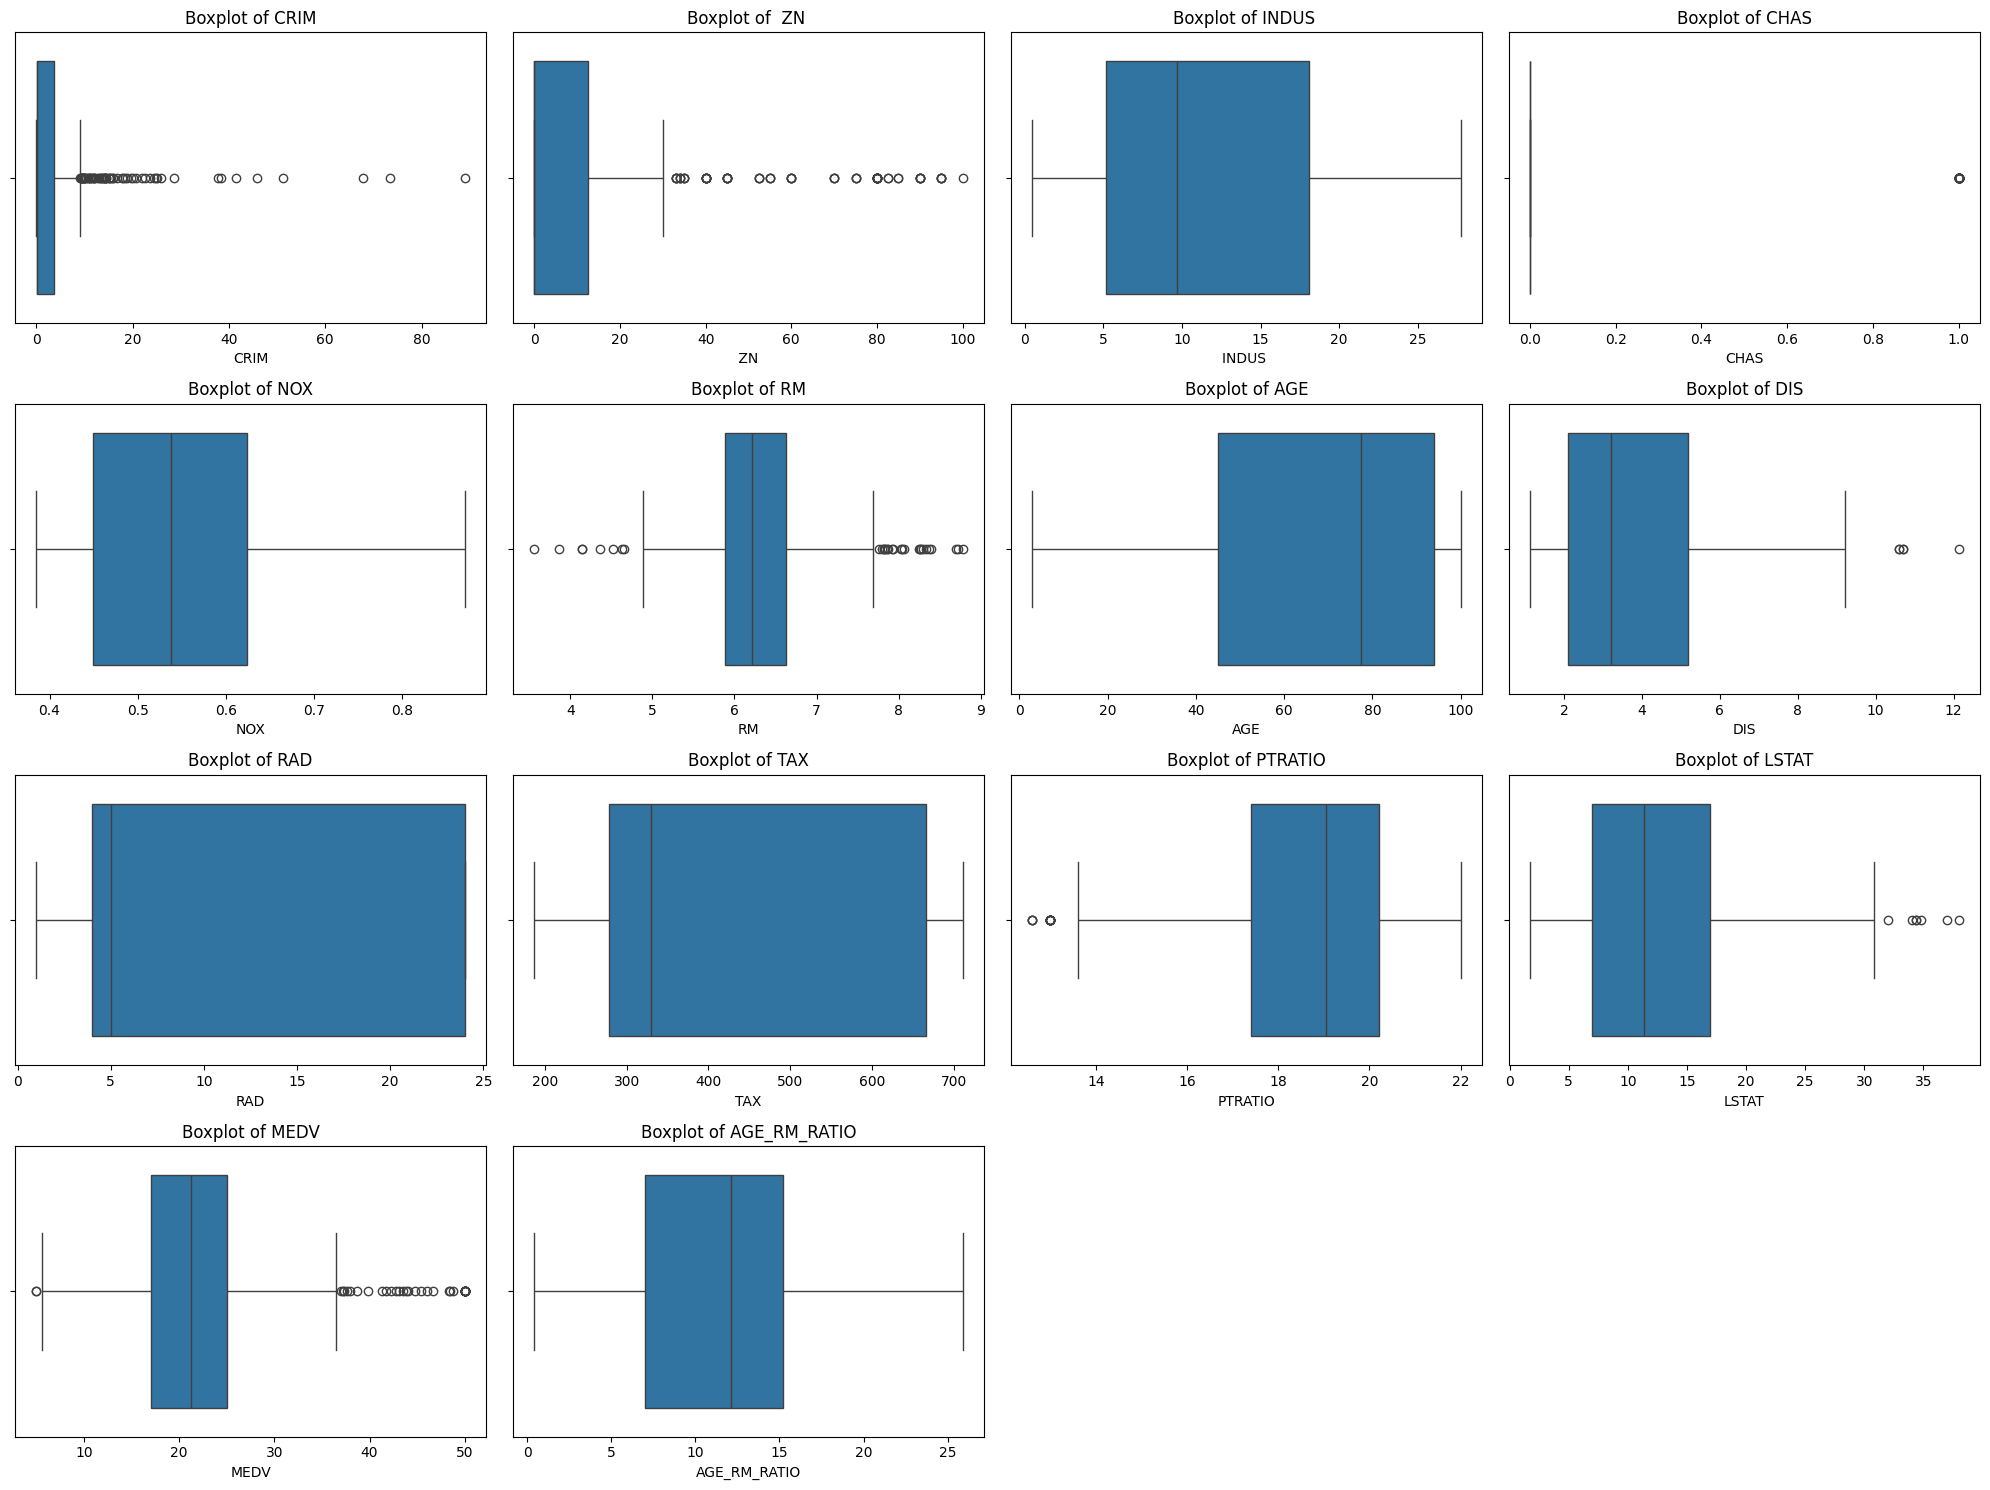

In [48]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig("day4_boxplots.png")
plt.show()

In [50]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [52]:
results = {
    "LinearRegression": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        "R2": r2_score(y_test, y_pred_lr)
    },
    "Ridge": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        "R2": r2_score(y_test, y_pred_ridge)
    },
    "Lasso": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        "R2": r2_score(y_test, y_pred_lasso)
    }
}



In [53]:
 results

{'LinearRegression': {'RMSE': np.float64(4.894752558051351),
  'R2': 0.6732937866825752},
 'Ridge': {'RMSE': np.float64(4.900001431728588), 'R2': 0.6725927260775391},
 'Lasso': {'RMSE': np.float64(5.060219894526383), 'R2': 0.6508317956952948}}